In [1]:
import os
print(os.getcwd())

/workspaces/EspecMiguel/Trabajo Final


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [3]:
df = pd.read_csv('../datos/Estudiantes.csv', sep = ';')
df.head()

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,Estrato 5,No,Si,Si,52.0,34,32,41,44,194
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Estrato 6,Si,Si,Si,47.0,47,46,52,58,252
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Estrato 6,Si,Si,Si,87.0,79,74,77,71,381
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Estrato 4,Si,Si,Si,81.0,81,66,75,73,372
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,Estrato 1,No,No,No,45.0,36,32,39,46,194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110328 entries, 0 to 110327
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO                      110328 non-null  int64  
 1   ESTU_CONSECUTIVO             110328 non-null  object 
 2   COLE_AREA_UBICACION          110328 non-null  object 
 3   COLE_BILINGUE                92637 non-null   object 
 4   COLE_CALENDARIO              110328 non-null  object 
 5   COLE_DEPTO_UBICACION         110328 non-null  object 
 6   COLE_GENERO                  110328 non-null  object 
 7   COLE_JORNADA                 110328 non-null  object 
 8   COLE_NATURALEZA              110328 non-null  object 
 9   ESTU_COD_DEPTO_PRESENTACION  110328 non-null  int64  
 10  ESTU_DEPTO_PRESENTACION      110328 non-null  object 
 11  ESTU_GENERO                  110309 non-null  object 
 12  FAMI_EDUCACIONMADRE          103668 non-null  object 
 13 

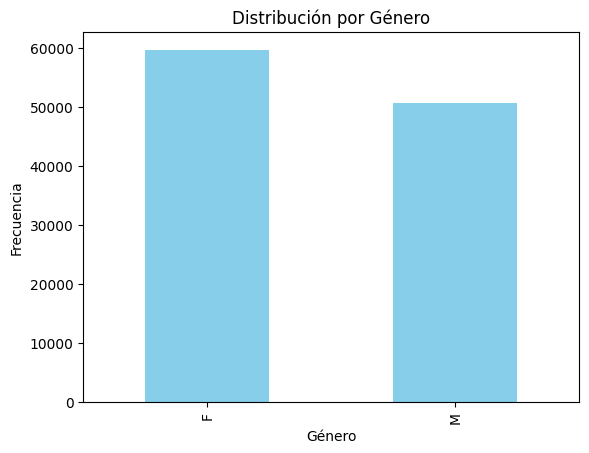

In [5]:
df['ESTU_GENERO'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

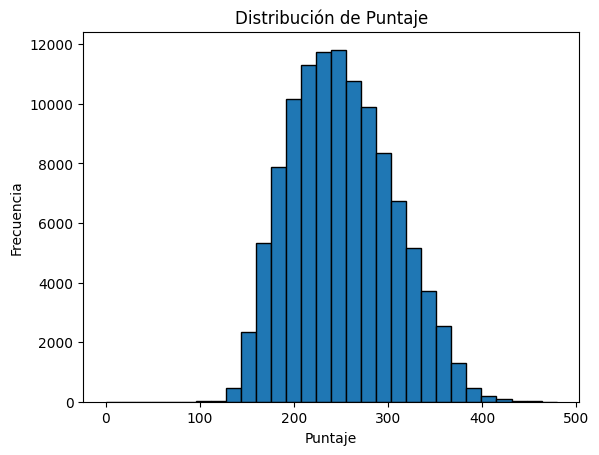

In [6]:
df['PUNT_GLOBAL'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución de Puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

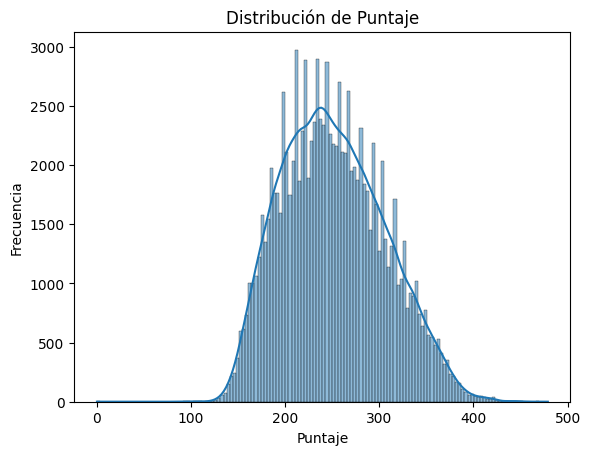

In [7]:
sns.histplot(df['PUNT_GLOBAL'], kde=True)
plt.title('Distribución de Puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

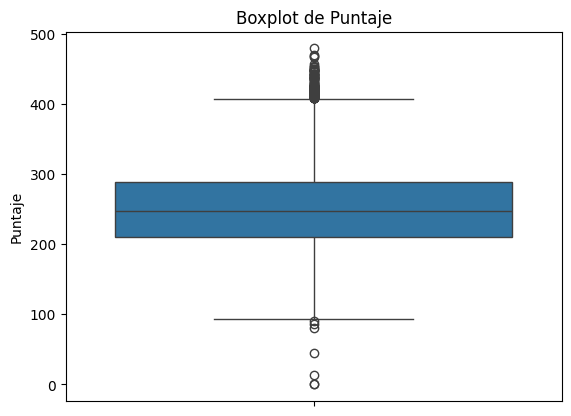

In [8]:
sns.boxplot(y=df['PUNT_GLOBAL'])
plt.title('Boxplot de Puntaje')
plt.ylabel('Puntaje')
plt.show()

<Axes: xlabel='COLE_CALENDARIO', ylabel='PUNT_GLOBAL'>

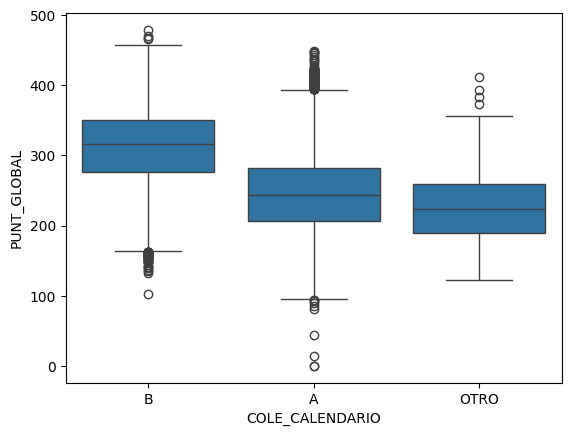

In [9]:
sns.boxplot(x='COLE_CALENDARIO', y='PUNT_GLOBAL', data=df)

<Axes: xlabel='ESTU_GENERO', ylabel='PUNT_GLOBAL'>

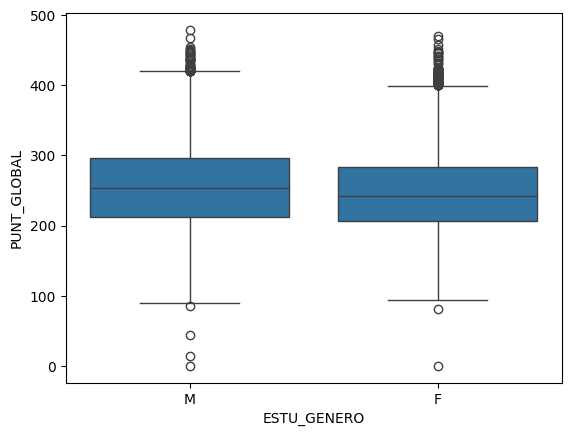

In [10]:
sns.boxplot(x='ESTU_GENERO', y='PUNT_GLOBAL', data=df)

<Axes: xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

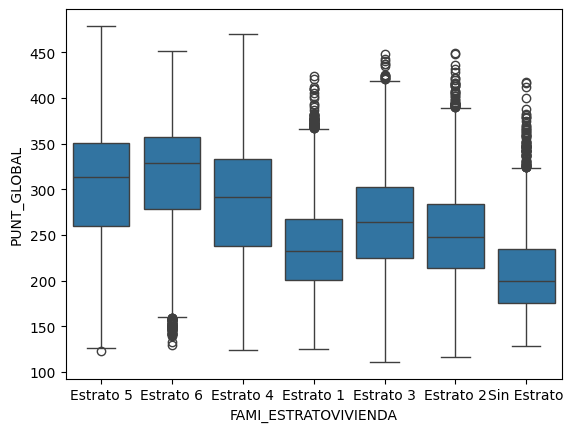

In [11]:
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=df)

<Axes: >

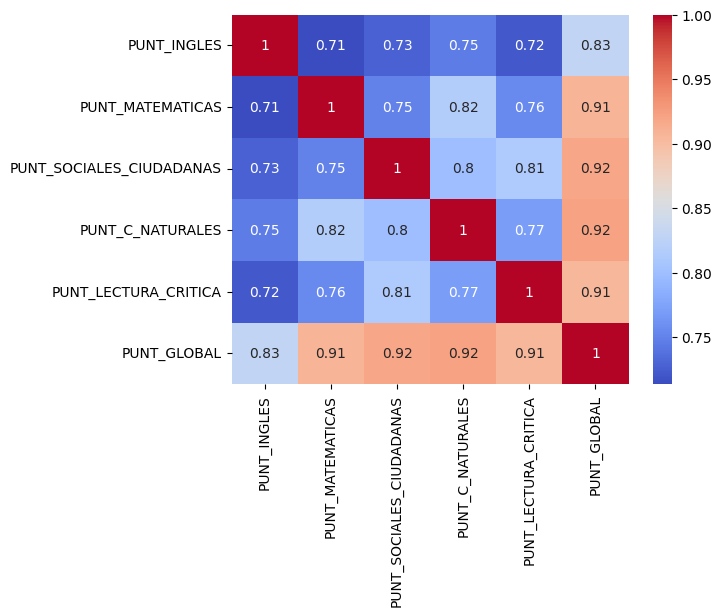

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

puntajes = df[['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']]
corr = puntajes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [14]:
df[Puntaje_Alto] = (df[PUNT_GLOBAL] >= 280).astype(int)

df.head()

NameError: name 'PUNT_GLOBAL' is not defined

In [37]:
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].str.extract('(\d+)').astype(float)
df.head()

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Puntaje_Alto
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,No,Si,Si,52.0,34,32,41,44,194,0
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Si,Si,Si,47.0,47,46,52,58,252,0
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Si,Si,Si,87.0,79,74,77,71,381,1
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Si,Si,Si,81.0,81,66,75,73,372,1
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,No,No,No,45.0,36,32,39,46,194,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_before = df[[FAMI_ESTRATOVIVIENDA, ESTU_COD_DEPTO_PRESENTACION]].dropna()
Xb = df_before
yb = df.loc[df_before.index, Puntaje_Alto]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=350, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print(✅ Exactitud antes de la limpieza:, round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.9514


In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df.copy()

# Imputación
imputer_edad = SimpleImputer(strategy='median')
df_clean['FAMI_ESTRATOVIVIENDA'] = imputer_edad.fit_transform(df_clean[['FAMI_ESTRATOVIVIENDA']])

imputer_ingreso = SimpleImputer(strategy='mean')
df_clean['ESTU_COD_DEPTO_PRESENTACION'] = imputer_ingreso.fit_transform(df_clean[['ESTU_COD_DEPTO_PRESENTACION']])

imputer_Area = SimpleImputer(strategy='most_frequent')
df_clean['COLE_AREA_UBICACION'] = imputer_Area.fit_transform(df_clean[['COLE_AREA_UBICACION']]).ravel()

imputer_Bilingue = SimpleImputer(strategy='most_frequent')
df_clean['COLE_BILINGUE'] = imputer_Bilingue.fit_transform(df_clean[['COLE_BILINGUE']]).ravel()

imputer_CALENDARIO = SimpleImputer(strategy='most_frequent')
df_clean['COLE_CALENDARIO'] = imputer_CALENDARIO.fit_transform(df_clean[['COLE_CALENDARIO']]).ravel()
imputer_GENERO = SimpleImputer(strategy='most_frequent')
df_clean['COLE_GENERO'] = imputer_GENERO.fit_transform(df_clean[['COLE_GENERO']]).ravel()
imputer_JORNADA = SimpleImputer(strategy='most_frequent')
df_clean[ 'COLE_JORNADA' ] = imputer_JORNADA.fit_transform(df_clean[[ 'COLE_JORNADA' ]]).ravel()
imputer_NATURALEZA = SimpleImputer(strategy='most_frequent')
df_clean[ 'COLE_NATURALEZA' ] = imputer_NATURALEZA.fit_transform(df_clean[[ 'COLE_NATURALEZA' ]]).ravel()
imputer_EDUCACIONMADRE = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_EDUCACIONMADRE' ] = imputer_EDUCACIONMADRE.fit_transform(df_clean[[ 'FAMI_EDUCACIONMADRE' ]]).ravel()
imputer_EDUCACIONPADRE = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_EDUCACIONPADRE'] = imputer_EDUCACIONPADRE.fit_transform(df_clean[[ 'FAMI_EDUCACIONPADRE']]).ravel()
imputer_TIENEAUTOMOVIL = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENEAUTOMOVIL' ] = imputer_TIENEAUTOMOVIL.fit_transform(df_clean[[ 'FAMI_TIENEAUTOMOVIL' ]]).ravel()
imputer_TIENECOMPUTADOR = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENECOMPUTADOR' ] = imputer_TIENECOMPUTADOR.fit_transform(df_clean[[ 'FAMI_TIENECOMPUTADOR' ]]).ravel()
imputer_TIENEINTERNET = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENEINTERNET'] = imputer_TIENEINTERNET.fit_transform(df_clean[[ 'FAMI_TIENEINTERNET']]).ravel()

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO','COLE_GENERO', 'COLE_JORNADA' , 'COLE_NATURALEZA' , 'FAMI_EDUCACIONMADRE' , 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL' , 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']] = scaler.fit_transform(df_clean[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']])

In [48]:
Xc = df_clean.drop(columns=['ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_DEPTO_UBICACION','COLE_JORNADA','COLE_NATURALEZA','ESTU_COD_DEPTO_PRESENTACION','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET','Puntaje_Alto'])
yc = df_clean['Puntaje_Alto']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

KeyError: "['COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET'] not found in axis"